# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [11]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [19]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Categoria').round(2)

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1783.56
1,comidas-preparadas,3095.04
2,congelados,2108.04
3,frutas,1724.47
4,instantaneos-y-sopas,765.49
5,lacteos,2385.22
6,verduras,1343.30


In [21]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Categoria').round(2)

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1569.0
1,comidas-preparadas,3290.0
2,congelados,1519.0
3,frutas,1195.0
4,instantaneos-y-sopas,439.0
5,lacteos,989.0
6,verduras,1180.0


Digite aqui as categorias:
- belleza-y-cuidado-personal : Média **acima** da mediana
- comidas-preparadas : Média **abaixo** da mediana
- congelados : Média **acima** da mediana
- frutas : Média **acima** da mediana
- instantaneos-y-sopas : Média **acima** da mediana
- lacteos : Média **acima** da mediana
- verduras : Média **abaixo** da mediana

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [28]:
#Seu código aqui
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False).round(2)
desvio_padrao_por_categoria

,Categoria,Preco_Normal
5,lacteos,3925.82
0,belleza-y-cuidado-personal,2210.04
2,congelados,2111.54
1,comidas-preparadas,2019.91
3,frutas,1639.15
4,instantaneos-y-sopas,1170.23
6,verduras,1012.70


Digite nesse campo o comportamento que você identificou.  
As categorias que apresentaram maior desvio padão foram: belleza-y-cuidado-personal, comidas-preparadas, congelados e lacteos. 
- belleza-y-cuidado-personal : Média **acima** da mediana
- comidas-preparadas : Média **abaixo** da mediana
- congelados : Média **acima** da mediana
- lacteos : Média **acima** da mediana

Em quase todas as categorias identifica-se que a média está acima da mediana, apenas em 'comidas_preparadas' esse fato se inverte - o que pode indicar a presença de um outlier fazendo o valor da média ficar abaixo. 

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

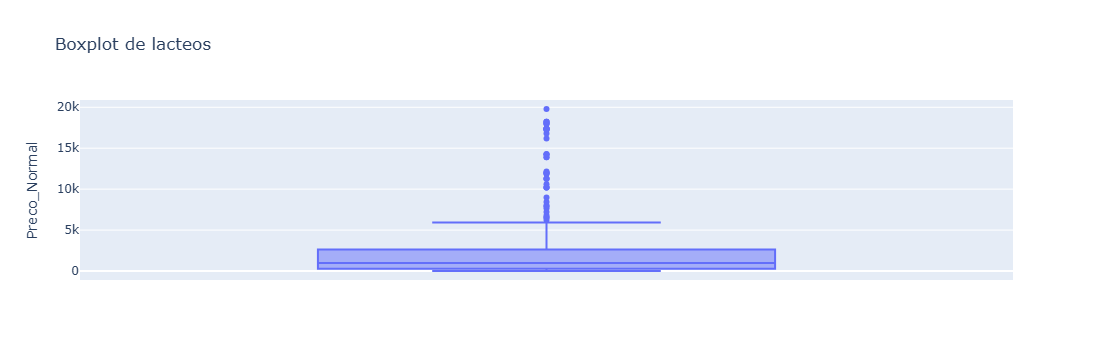

In [30]:
#Seu código aqui
fig = px.box(df.loc[df['Categoria'] == 'lacteos'], y='Preco_Normal', title = 'Boxplot de lacteos')
fig.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

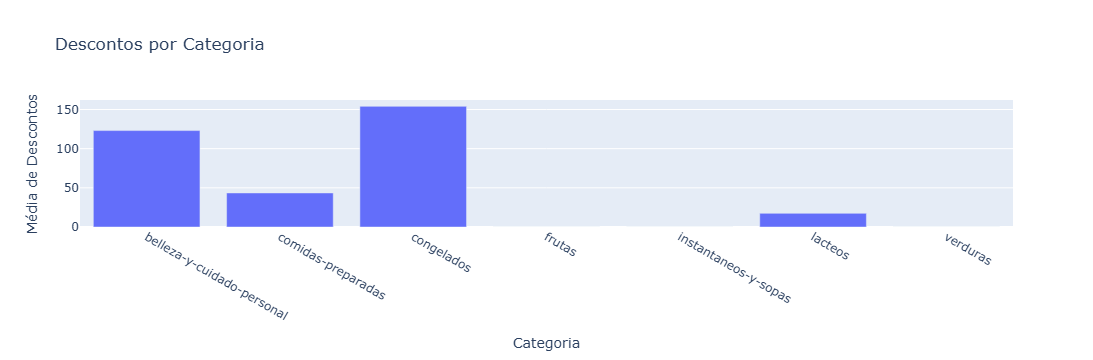

In [39]:
# Seu código aqui
media_descontos_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index().round(2)
fig = px.bar(media_descontos_categoria, x = 'Categoria', y = 'Desconto',
             title = 'Descontos por Categoria',
             labels = {'Categoria' : 'Categoria', 'Desconto' : 'Média de Descontos'})
fig.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

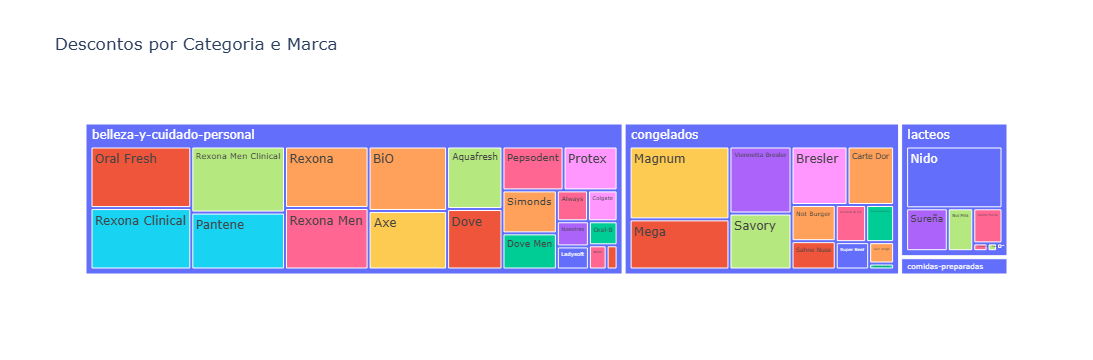

In [44]:
# Seu código aqui
desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index().round(2)
fig = px.treemap(desconto_por_categoria_marca,
                 path = ['Categoria', 'Marca'],
                 values = 'Desconto',
                 title = 'Descontos por Categoria e Marca',
                 color = 'Marca')
fig.show()